# NYPD Motor Vehicle Collision Exploratory Analysis
____
Micaela Flores (mrf444), Laureano Nisenbaum (lvn218), Jason Li (yl2813), Trevor Mitchell (tim225)

### Cleaning the Data: Cleaning from Raw Data and Regrouping Accident Causes (Micaela)

In [1]:
import numpy as np
import pandas as pd
import datetime as dt

from sklearn.preprocessing import LabelEncoder

def cleanData(filename,startdate,enddate):
    df = pd.read_csv(filename)
    
    #convert date column to datetime objects
    df["DATE"] = pd.to_datetime(df["DATE"]) #takes a bit to run 
    
    start, end = pd.to_datetime([startdate,enddate],format='%d%b%Y')
    
    #filter out only dates starting from start date and ending with end date
    df = df[(df["DATE"] >= start) & (df["DATE"] <= end)]
    
    #drop all rows that contain NaN in the Borough and Zip Code column 
    df = df.dropna(subset=["BOROUGH","ZIP CODE"])
    
    #change Time column to datetime objects
    df['TIME'] = pd.to_datetime(df['TIME'],format= '%H:%M' ).dt.time
    
    #change Zip Code column to integers
    df['ZIP CODE'] = df['ZIP CODE'].astype('int64')
    
    #only get relevant columns
    df = df.drop(["LOCATION","LATITUDE","LONGITUDE","ON STREET NAME","CROSS STREET NAME",\
         "OFF STREET NAME","CONTRIBUTING FACTOR VEHICLE 3","CONTRIBUTING FACTOR VEHICLE 4",\
         "CONTRIBUTING FACTOR VEHICLE 5","UNIQUE KEY","VEHICLE TYPE CODE 1",
         "VEHICLE TYPE CODE 2","VEHICLE TYPE CODE 3","VEHICLE TYPE CODE 4","VEHICLE TYPE CODE 5"],axis=1)
    df = df.loc[df["CONTRIBUTING FACTOR VEHICLE 1"] != "Unspecified"]
    
    #encode the string accident causes into categorical numbers for later grouping
    le = LabelEncoder()
    df.insert(13,'REASON',le.fit_transform(df['CONTRIBUTING FACTOR VEHICLE 1'].astype(str)))
    map_key = dict(zip(le.classes_, le.transform(le.classes_))) #for our purposes to know how numbers match up
    
    reason_map = {9:'Distracted Driving',33:'Distracted Driving',14:'Distracted Driving',6:'Distracted Driving',\
              7:'Distracted Driving',8:'Distracted Driving',28:'Distracted Driving',25:'Distracted Driving',\
              54:'Distracted Driving',45:'Distracted Driving',18:'Impaired Driving',2:'Impaired Driving',\
              22:'Impaired Driving',23:'Impaired Driving',17:'Impaired Driving',26:'Impaired Driving',\
              39:'Impaired Driving',12:'Impaired Driving',13:'Impaired Driving',40:'Impaired Driving',\
              4:'Bad Driving',52:'Bad Driving',34:'Bad Driving',16:'Bad Driving', 19:'Bad Driving', \
              35:'Bad Driving',53:'Bad Driving',51:'Bad Driving',10:'Bad Driving',1:'Bad Driving',\
              50:'Bad Driving',15:'Bad Driving', 56:'Poor Driving Conditions',20:'Poor Driving Conditions',\
              27:'Poor Driving Conditions',37:'Poor Driving Conditions',24:'Unsafe Infrastructure',\
              36:'Unsafe Infrastructure',49:'Unsafe Infrastructure',29:'Unsafe Infrastructure',\
              43:'Unsafe Infrastructure', 30:'External Factor', 38:'External Factor',3:'External Factor',\
              31:'External Factor',41:'External Factor',42:'External Factor',47:'Mechanical Failure',\
              5:'Mechanical Failure',44:'Mechanical Failure',0:'Mechanical Failure',21:'Mechanical Failure',\
              48:'Mechanical Failure',57:'Mechanical Failure',32:'Other',55:'Other',46:'Other',11:'Other',58:'Other'}
    
    #group into our designated categories
    df['REASON'] = df['REASON'].map(reason_map)
    
    return df

In [2]:
#df = cleanData("NYPD_Motor_Vehicle_Collisions.csv","1NOV2017","31OCT2018")
#print("Size of data after cleaning: ",df.shape)
#df.head(5)

### Import Zipcode Shape file (Jason)

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
def cleanDataZipCode(filename):
    Zipcode_shape = gpd.read_file(filename)
    Zipcode_shape = Zipcode_shape.drop(['BLDGZIP','STATE','ST_FIPS','CTY_FIPS','URL','SHAPE_AREA','SHAPE_LEN',\
                                    'AREA','PO_NAME'],axis=1)
    Zipcode_shape["ZIPCODE"] = Zipcode_shape["ZIPCODE"].astype(str).astype(int)
    return Zipcode_shape

In [4]:
df_zipcode = cleanDataZipCode("ZIP_CODE_040114/ZIP_CODE_040114.shp")
#df_zipcode.head(5)
df_zipcode

,ZIPCODE,POPULATION,COUNTY,geometry
0,11436,18681.0,Queens,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,11213,62426.0,Kings,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,11212,83866.0,Kings,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,11225,56527.0,Kings,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,11218,72280.0,Kings,"POLYGON ((991997.1134308875 176307.4958601296,..."
5,11226,106132.0,Kings,"POLYGON ((994821.4729396403 177865.7178093046,..."
6,11219,92561.0,Kings,"POLYGON ((987286.3515269756 173946.4621963799,..."
7,11210,67067.0,Kings,"POLYGON ((995796.0097044706 171110.0666224658,..."
8,11230,80857.0,Kings,"POLYGON ((994099.2959063053 171240.7064530551,..."
9,11204,77354.0,Kings,"POLYGON ((989500.1699339747 170730.1687602103,..."


In [5]:
#Create new csv files instead of cleaning data everytime
#df.to_csv('cleaned_df.csv')
df = pd.read_csv('cleaned_df.csv').drop(['Unnamed: 0'], axis=1)

In [6]:
## Return a Dataframe for each Borough
#def Merge_twoDFbyZC(df_zipcode,main_df):
#    result = df_zipcode.merge(df, left_on='ZIPCODE', right_on='ZIP CODE', how='inner').drop(['ZIP CODE'],axis = 1)
#    return result
#new_df = Merge_twoDFbyZC(df_zipcode,df)

### HEATMAP (Group by Zipcode and Borough) (Jason)

In [6]:
def groupby_all(borough_df,df):
    temp_df = df.groupby(['ZIP CODE','BOROUGH','REASON']).size().unstack(2).reset_index().fillna(0)
    temp_df.columns.name = ''
    result = borough_df.merge(temp_df, left_on='ZIPCODE', right_on='ZIP CODE', how='inner').drop('ZIP CODE', axis = 1)
    return result

In [7]:
df_groupall = groupby_all(df_zipcode,df)

In [8]:
df_groupall[['Bad Driving Per Cap','Distracted Driving Per Cap', 'External Factor Per Cap',\
             'Poor Driving Conditions Per Cap','Unsafe Infrastructure Per Cap','Mechanical Failure Per Cap'\
             ,'Other Per Cap','Impaired Driving Per Cap']] \
= df_groupall[['Bad Driving','Distracted Driving','External Factor','Poor Driving Conditions'\
               ,'Unsafe Infrastructure','Mechanical Failure','Other','Impaired Driving']\
             ].div(df_groupall['POPULATION'].values,axis=0)

In [9]:
Brooklyn = df_groupall[df_groupall['BOROUGH'] == 'BROOKLYN']
Bronx = df_groupall[df_groupall['BOROUGH'] == 'BRONX']
Manhattan = df_groupall[df_groupall['BOROUGH'] == 'MANHATTAN']
#No one lives in Central Park
Manhattan = Manhattan[Manhattan['POPULATION'] != 0]
Queens = df_groupall[df_groupall['BOROUGH'] == 'QUEENS']
Queens = Queens[Queens['POPULATION'] != 0]
Staten_Island = df_groupall[df_groupall['BOROUGH'] == 'STATEN ISLAND']

In [10]:
Queens.loc[Queens['ZIPCODE'] == 11430, ~Queens.\
           columns.isin(['ZIPCODE', 'POPULATION', 'COUNTY', 'geometry','BOROUGH'])] = 0
#df['column_name'] == some_value

In [11]:
Queens[Queens['POPULATION'] == 0]

,ZIPCODE,POPULATION,COUNTY,geometry,BOROUGH,Bad Driving,Distracted Driving,External Factor,Impaired Driving,Mechanical Failure,...,Poor Driving Conditions,Unsafe Infrastructure,Bad Driving Per Cap,Distracted Driving Per Cap,External Factor Per Cap,Poor Driving Conditions Per Cap,Unsafe Infrastructure Per Cap,Mechanical Failure Per Cap,Other Per Cap,Impaired Driving Per Cap


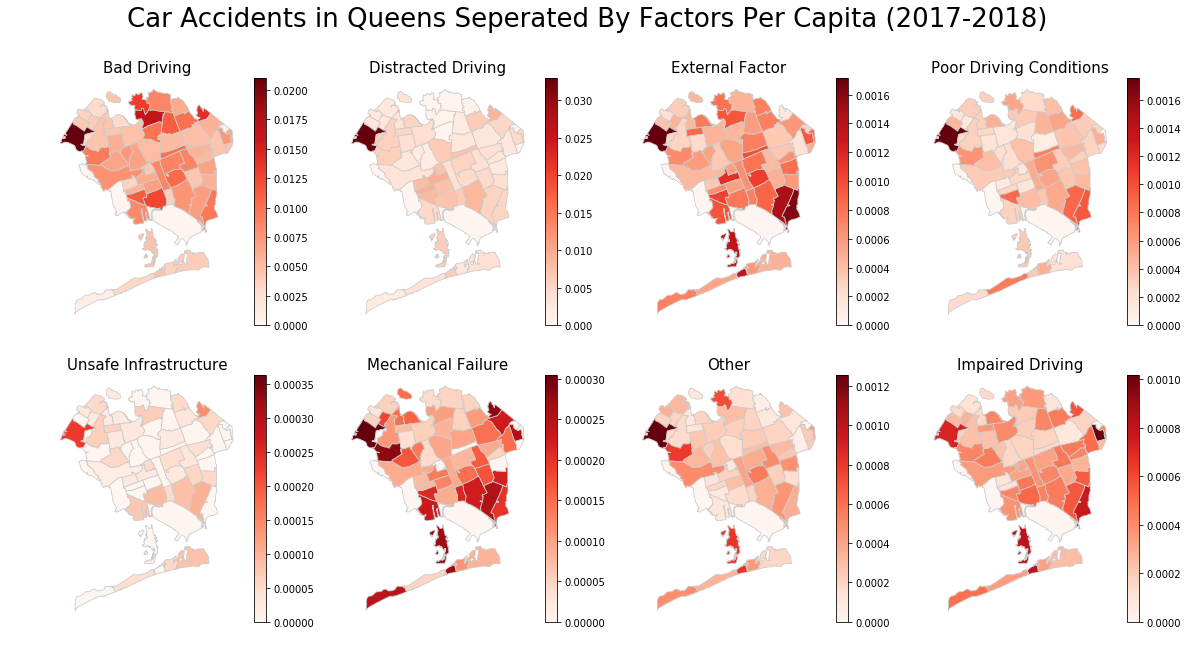

In [12]:
import matplotlib.pyplot as plt
# set a variable that will call whatever column we want to visualise on the map
#variable = "Distracted Driving"
var_list = ['Bad Driving Per Cap','Distracted Driving Per Cap', 'External Factor Per Cap',\
             'Poor Driving Conditions Per Cap','Unsafe Infrastructure Per Cap','Mechanical Failure Per Cap'\
             ,'Other Per Cap','Impaired Driving Per Cap']
title_list = ['Bad Driving','Distracted Driving','External Factor','Poor Driving Conditions'\
               ,'Unsafe Infrastructure','Mechanical Failure','Other','Impaired Driving']
# create figure and axes for Matplotlib
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
counter = 0
for row in range(0,2):
    for item in range(0,4):
        Queens.plot(column=var_list[counter], cmap='Reds', linewidth=0.8, ax=ax[row, item], edgecolor='0.8')
        # set the range for the choropleth
        vmin, vmax = 0, float(max(Queens[var_list[counter]]))
        ax[row, item].axis('off')
        ax[row, item].set_title(title_list[counter],fontsize=15)
        # Create colorbar as a legend
        sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
        # empty array for the data range
        sm._A = []
        # add the colorbar to the figure
        cbar = fig.colorbar(sm,ax=ax[row, item])
        counter += 1

fig.suptitle("Car Accidents in Queens Seperated By Factors Per Capita (2017-2018)",fontsize=26)
# create an annotation for the data source
#plt.annotate('Source: NYC Open Data, 2018',xy=(0.2, .15),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
plt.show()

### BARGRAPH (Group by Borough) (Jason)

In [118]:
def groupby_borough(df):
    temp_df = df.groupby(['REASON','BOROUGH']).size().unstack().sort_values('REASON',ascending= True).head(3).T
    return temp_df

In [119]:
df_barh = groupby_borough(df)
df_barh.head()

REASON,Bad Driving,Distracted Driving,External Factor
BOROUGH,,,
BRONX,8772,3278,1840
BROOKLYN,15870,9771,1917
MANHATTAN,11574,9000,1850
QUEENS,15763,10565,1393
STATEN ISLAND,2555,1491,320


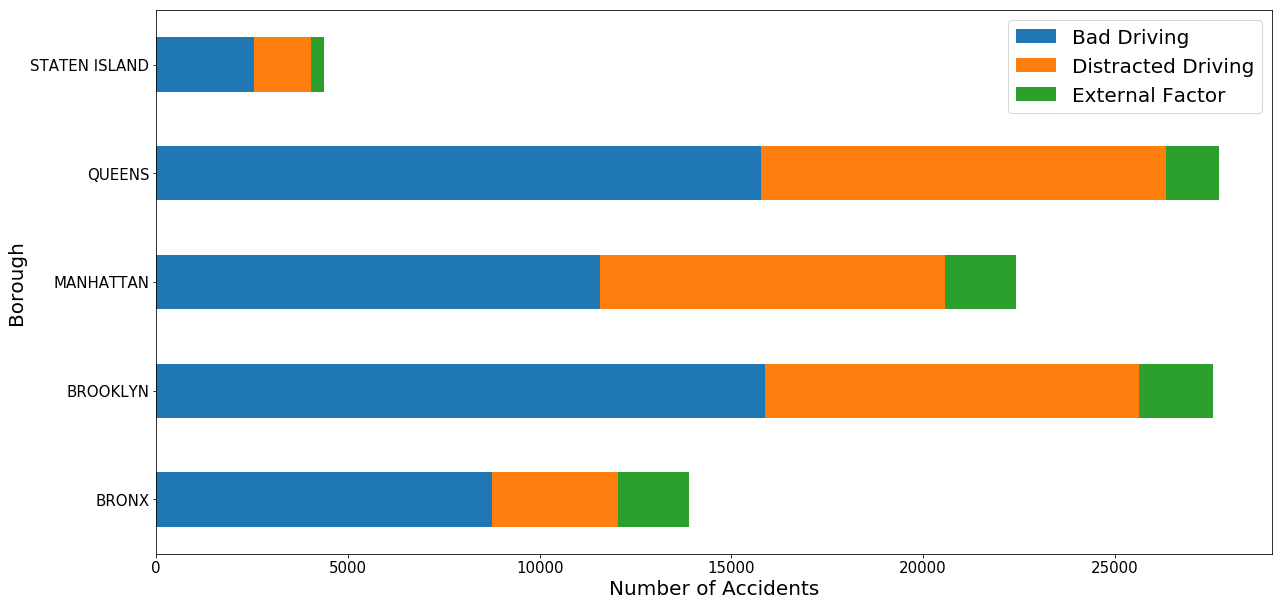

In [120]:
df_barh.plot(kind='barh', figsize=(20, 10),stacked=True)
plt.xlabel('Number of Accidents', fontsize=20)
plt.ylabel('Borough', fontsize=20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(loc=1, prop={'size': 20})
plt.show()

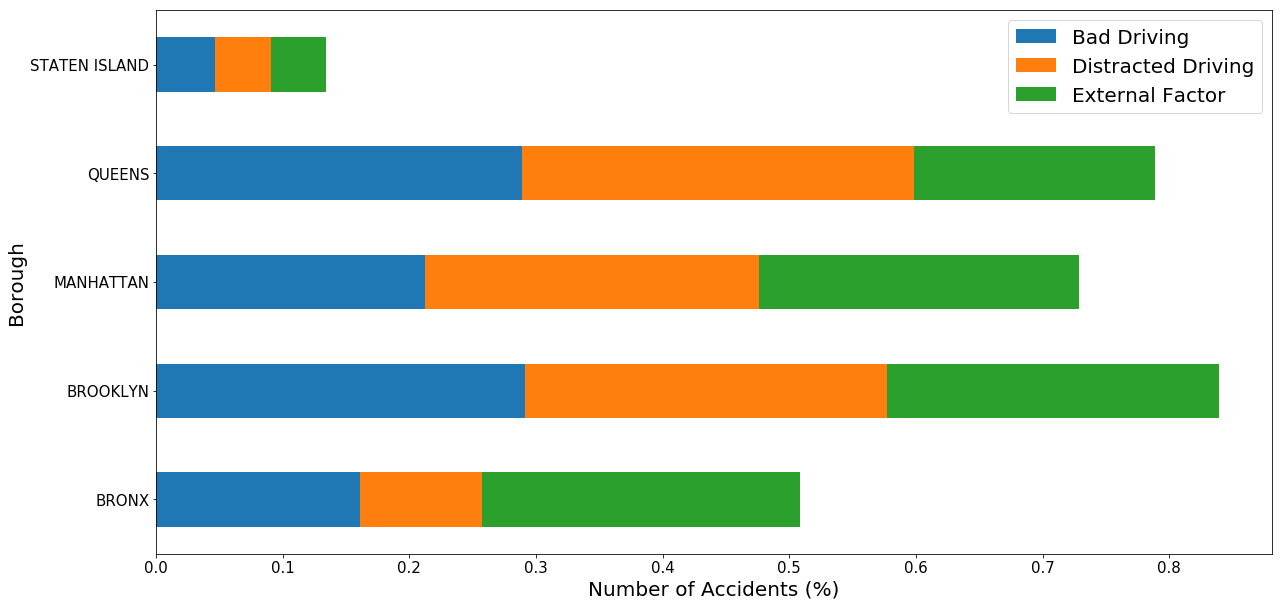

In [168]:
df_barh_p = df_barh/df_barh.sum(0)#*100
df_barh_p.plot(kind='barh', figsize=(20, 10),stacked=True)
plt.xlabel('Number of Accidents (%)', fontsize=20)
plt.ylabel('Borough', fontsize=20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(loc=1, prop={'size': 20})
plt.show()

In [4]:
def groupby_borough_time(df):
    temp_df = df.groupby(['DATE','BOROUGH'])['NUMBER OF PERSONS INJURED'].apply()#.size().groups.keys()#.unstack().sort_values('REASON',ascending= True).head(3).T
    return temp_df


In [5]:
wow = groupby_borough_time(df)#.reset_index().set_index('DATE')
#wow.columns
wow.head()


TypeError: apply() missing 1 required positional argument: 'func'

In [11]:
import matplotlib.pyplot as plt

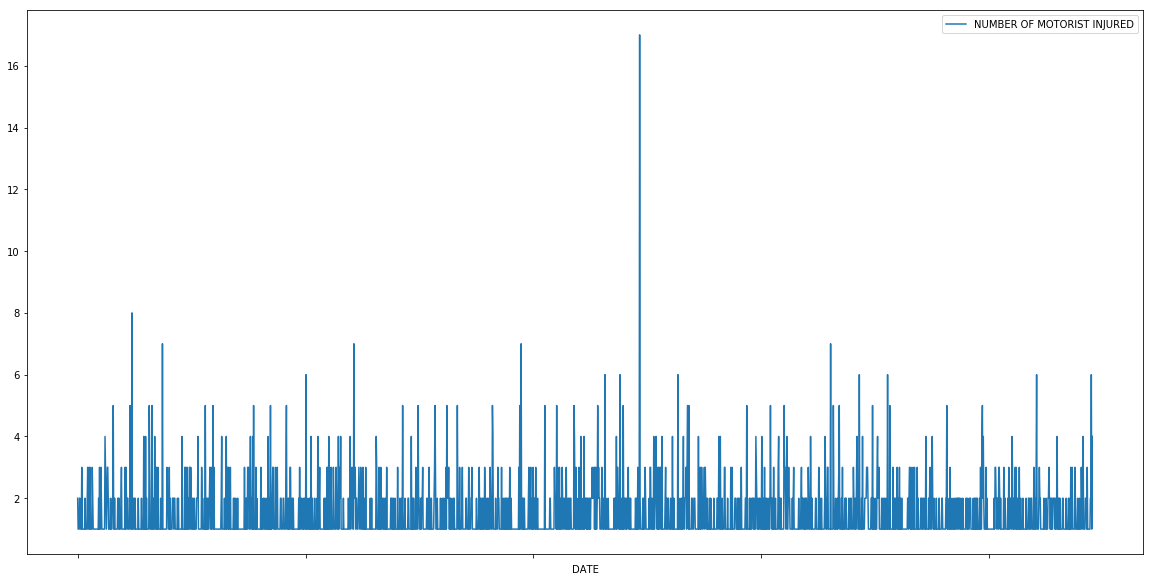

In [58]:
df2 = df[df.BOROUGH == 'BRONX']
df3 = df2[df2['NUMBER OF MOTORIST INJURED'] != 0]
df4 = df3[['NUMBER OF MOTORIST INJURED', 'DATE']].set_index('DATE')
#df4 = df3.set_index('DATE')
#df5 = df4[df4['NUMBER OF PEDESTRIANS INJURED'] > 3]
df4.plot(figsize=(20, 10))

In [52]:
df6 =  df[df['NUMBER OF PERSONS INJURED'] == 17]

In [74]:
#df_t = df.head(100)

In [78]:
j = df.groupby(['DATE','BOROUGH'])['NUMBER OF PEDESTRIANS INJURED', \
                               'NUMBER OF CYCLIST INJURED','NUMBER OF MOTORIST INJURED' ].sum()


In [80]:
j2 = j.unstack()

In [99]:
j2

NUMBER OF PEDESTRIANS INJURED                            \
BOROUGH                            BRONX BROOKLYN MANHATTAN QUEENS   
DATE                                                                 
2017-11-01                             1        8         4      3   
2017-11-02                             5        8         2      8   
2017-11-03                             5        9         2     12   
2017-11-04                             3        8         2      5   
2017-11-05                             3        5         2      2   
2017-11-06                             1        3         3      5   
2017-11-07                             8       11         7     11   
2017-11-08                             4        2         3      7   
2017-11-09                             2        2         4      6   
2017-11-10                             3        5        10      5   
2017-11-11                             0       10         6      2   
2017-11-12                             2        1         0      4   
2017-11-13                             3        5         3      4   
2017-11-14                             1        2         2      2   
2017-11-15                             2        6         2      4   
2017-11-16                             6        7         4      8   
2017-11-17                             3        4         2     10   
2017-11-18                             0        7         6      7   
2017-11-19                             1        4         4      4   
2017-11-20                             0        8         2      6   
2017-11-21                             3        5         4      5   
2017-11-22                             2        6         4      5   
2017-11-23                             1        4         1      4   
2017-11-24                             3        5         4      2   
2017-11-25                             3        4         1      2   
2017-11-26                             2        3         4      3   
2017-11-27                             4        6         1      7   
2017-11-28                             6        8         0      4   
2017-11-29                             2        5         5      4   
2017-11-30                             4        5         2      5   
...                                  ...      ...       ...    ...   
2018-10-02                             3        5         7      3   
2018-10-03                             3        7         2      5   
2018-10-04                             1        8         7      8   
2018-10-05                             6        5         6      3   
2018-10-06                             3        1         3      2   
2018-10-07                             2        6         0      1   
2018-10-08                             0        6         1      2   
2018-10-09                             1        3         3      7   
2018-10-10                             3        7         5      4   
2018-10-11                             4       12         2     10   
2018-10-12                             4        2         3      6   
2018-10-13                             3        5         3      4   
2018-10-14                             4        2         2      1   
2018-10-15                             2        8         7      5   
2018-10-16                             3        6         2      3   
2018-10-17                             5       13         3      5   
2018-10-18                             3        7         3      6   
2018-10-19                             3        7         2      7   
2018-10-20                             1        5         3      4   
2018-10-21                             2        5         4      4   
2018-10-22                             1        2         2      6   
2018-10-23                             5        6         5      2   
2018-10-24                             5        1         4      3   
2018-10-25           

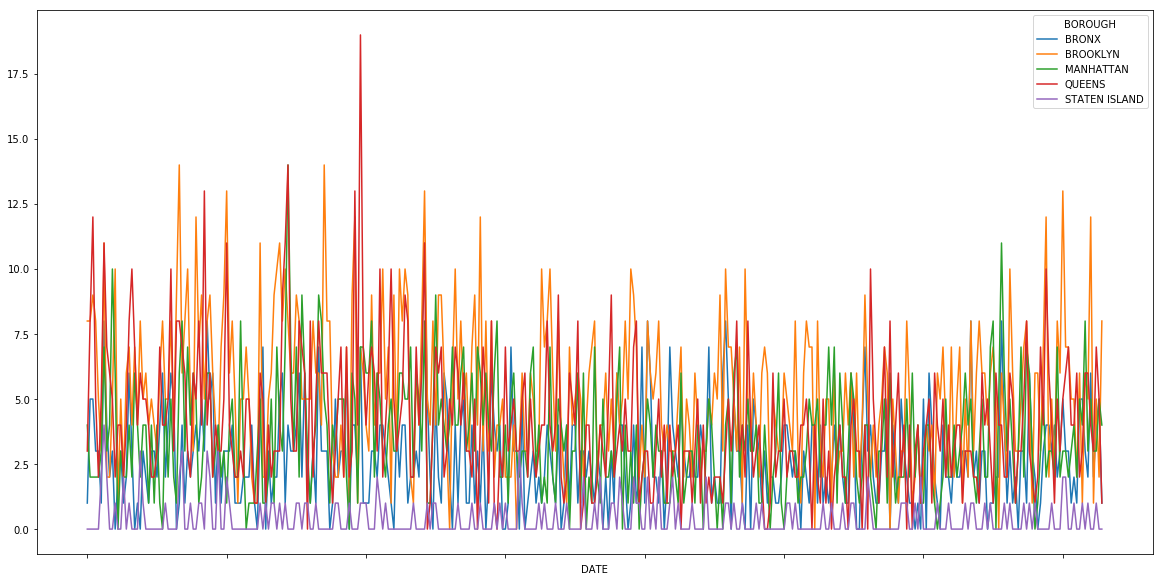

In [98]:
j2['NUMBER OF PEDESTRIANS INJURED'].plot(figsize = (20,10))